<h1><center> Aula 11 - Floresta Aleatória</center></h1>

Na aula de prática de hoje iremos aprender a usar o método de aprendizagem de máquina chamado Floresta Aleatória (<i>Random Forest</i>). Floresta aleatórias é um dos algoritmos mais utilizados, devido à sua simplicidade e o fato de que pode ser utilizado para tarefas de classificação e também de regressão, que serão abordadas a seguir. 
<br><br>
Iremos utilizar novamente a <i>dataset</i> do <a href="https://drive.google.com/open?id=1bvQeIl0EUDW_UVTARilsTW3PLDuuhlxl"><b>Titanic</b></a> (em português) (<a href = "https://www.kaggle.com/c/titanic/data">dataset original - Kaggle</a>) . Primeiramente iremos fazer as devidas transformações nos dados, como seleção de <i>features</i>, remoção de valores nulos, e <i>"dummização"</i>. Depois, iremos separar o <i>dataset</i> em treino e teste. Em seguida, iremos os conceitos de Grid Search e Cross-validation para selecionar os melhores parametros para criar nossa floresta. Por fim, apresentaremos os resultados do nosso modelo e salvaremos o mesmo em um arquivo, para que possamos carregado-lo e utilizar a predição novamente, sem precisarmos criar o modelo do zero novamente.
<br><br>
Segue link do Sklearn para Floresta Aleatórias <a href = https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html> Random Forest </a>

<h1><b>LET'S CODE!!</b></h1>

In [0]:
# BIBLIOTECAS DATA SCIENCE
import pandas as pd
import numpy as np

# BIBLIOTECAS DE PLOT
import matplotlib.pyplot as plt 
import seaborn as sns

In [0]:
# FUNÇÕES UTEIS
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.coolwarm):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# MOSTRA RESULTADOS
def mostra_resultados(y, y_pred, classes, normalize=False,
                      title='Confusion matrix', cmap=plt.cm.coolwarm):

    # Calcular os resultados
    cm = confusion_matrix(y, y_pred)
    FP = cm.sum(axis=0) - np.diag(cm)  # Falso Positivos
    FN = cm.sum(axis=1) - np.diag(cm)  # Falso Negativos
    TP = np.diag(cm)                   # Verdadeiro Positivo
    TN = cm.sum() - (FP + FN + TP)     # Verdadeiro Negativos
    TPR = TP / (TP + FN)  # Revocação    
    PPV = TP / (TP + FP)  # Precisao
    F1 = 2 * ((PPV * TPR) / (PPV + TPR)) # F1 Score
    ACC = (TP + TN) / (TP + FP + FN + TN)  # Acurácia

    # Exibe resultados
    print("    Verdadeiros Positivos:{}".format(TP))
    print("    Verdadeiros Negativos:{}".format(TN))
    print("    Falso Positivo:{}".format(FP))
    print("    Falso Negativo:{}".format(FN))
    
    print("    Revocação:{}".format(TPR))    
    print("    Precisao:{}".format(PPV))
    
    print("    F1 Score:{}".format(F1))
    print("    Acuracia:{}".format(ACC))
    
    plot_confusion_matrix(cm, classes)    

In [0]:
# CARREGA DATASET
df = pd.read_csv("titanic_ptbr.csv", sep=";", encoding="ansi")

In [0]:
df.head(3)

,id_passageiro,sobreviveu,tipo_classe,nome,sexo,idade,n_irmaos_abordo,n_pais_filhos_abordo,ticket,preco,cabine,local_embarque
0,1,não,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
2,3,sim,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**CAMPOS (FEATURES)**
* **id_passageiro** = ID do passageiro do navio (código primário).
* **sobreviveu** = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero não sobreviveu.
* **tipo_classe** = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe.
* **nome** = Nome do passageiro
* **sexo** = Gênero do passageiro, sendo masculino e feminino.
* **idade** = Idade do passageiro na data da ocorrência do naufrágio.
* **n_irmaos_abordo** = Número de irmãos / cônjuges a bordo.
* **n_pais_filhos_abordo** = Número de pais / filhos a bordo.
* **ticket** = Código do ticket.
* **preco** = Valor da passagem.
* **cabine** = Código de identificação da Cabine.
* **local_embarque** = Local onde o passageiro embarcou no navio.

In [0]:
# TRANSFORMANDO A FEATURE "sobreviveu" EM BINÁRIO, ONDE 'sim' = 1 e 'não' = 0
df["sobreviveu_mod"] = df["sobreviveu"].apply(lambda x: 1 if x == "sim" else 0)

In [0]:
# VALIDANDO TRANSFORMAÇÃO
df[["sobreviveu_mod", "sobreviveu"]].head(3)

,sobreviveu_mod,sobreviveu
0,0,não
1,1,sim
2,1,sim


In [0]:
# SOBREESCREVE A FEATURE 'sobreviveu'
df["sobreviveu"] = df["sobreviveu_mod"]

In [0]:
# PERCENTUAL DE ELEMENTOS NULOS
round(df.isnull().mean() * 100,2)

id_passageiro            0.00
sobreviveu               0.00
tipo_classe              0.00
nome                     0.00
sexo                     0.00
idade                   20.09
n_irmaos_abordo          0.00
n_pais_filhos_abordo     0.00
ticket                   0.00
preco                    0.08
cabine                  77.46
local_embarque           0.15
sobreviveu_mod           0.00
dtype: float64

In [0]:
df.head(2)

,id_passageiro,sobreviveu,tipo_classe,nome,sexo,idade,n_irmaos_abordo,n_pais_filhos_abordo,ticket,preco,cabine,local_embarque,sobreviveu_mod
0,1,0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C,1


In [0]:
# SELECIONANDO FEATURES
features_importantes = ["sobreviveu", "tipo_classe", "sexo", "idade", 
                        "n_irmaos_abordo", "n_pais_filhos_abordo", "preco", "local_embarque"]
df = df[features_importantes]

In [0]:
# REMOVE ELEMENTOS NULOS
df = df.dropna()

In [0]:
# PERCENTUAL DE ELEMENTOS NULOS
round(df.isnull().mean() * 100,2)

id_passageiro           0.0
sobreviveu              0.0
tipo_classe             0.0
nome                    0.0
sexo                    0.0
idade                   0.0
n_irmaos_abordo         0.0
n_pais_filhos_abordo    0.0
ticket                  0.0
preco                   0.0
cabine                  0.0
local_embarque          0.0
sobreviveu_mod          0.0
dtype: float64

In [0]:
df.head(3)

,sobreviveu,tipo_classe,sexo,idade,n_irmaos_abordo,n_pais_filhos_abordo,preco,local_embarque
0,0,3,homem,22.0,1,0,7.2500,S
1,1,1,mulher,38.0,1,0,71.2833,C
2,1,3,mulher,26.0,0,0,7.9250,S


In [0]:
# CRIAR A DUMMY PARA TRANSFORMAR OS DADOS CATEGÓRICOS EM NUMÉRICOS
features_categoricas = ["sexo", "local_embarque"]

dummy = pd.get_dummies(df, columns=features_categoricas)

In [0]:
# ESPIA A DUMMY
dummy

,sobreviveu,tipo_classe,idade,n_irmaos_abordo,n_pais_filhos_abordo,preco,sexo_homem,sexo_mulher,local_embarque_C,local_embarque_Q,local_embarque_S
0,0,3,22.0,1,0,7.2500,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1300,1,3,3.0,1,1,13.7750,0,1,0,0,1
1302,1,1,37.0,1,0,90.0000,0,1,0,1,0
1303,1,3,28.0,0,0,7.7750,0,1,0,0,1
1305,1,1,39.0,0,0,108.9000,0,1,1,0,0


In [0]:
# VERIFICA QUANTIDADE DE SOBREVIVENTES E NÃO SOBREVIVENTES (QUANTIDADE)
dummy["sobreviveu"].value_counts()

0    628
1    415
Name: sobreviveu, dtype: int64

In [0]:
# VERIFICA QUANTIDADE DE SOBREVIVENTES E NÃO SOBREVIVENTES (PERCENTUAL)
round(dummy["sobreviveu"].value_counts(normalize=True) * 100, 2)

0    60.21
1    39.79
Name: sobreviveu, dtype: float64

In [0]:
# ATRIBUINDO FEATURE RESPOSTA (TARGET/LABEL) EM y
y = dummy["sobreviveu"]

In [0]:
# ATRIBUINDO FEATURES A X (SEM TARGET/LABEL)
X = dummy.drop(columns="sobreviveu")

In [0]:
# SEPARANDO TREINO E TESTE
from sklearn.model_selection import train_test_split

test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [0]:
# TREINO COM RANDOM FOREST - Classificação (SEM GRID SEARCH E CROSS VALIDATION)
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

In [0]:
# PARAMETROS DA GRID
parametros_grid = {
    "n_estimators": [10, 50, 100, 200, 400],
    "max_depth": [5, 10, 20, 40],
    "max_features": ["auto"],
    "bootstrap": [True],
}

n_cross_validation = 5

In [0]:
# TREINO COM GRID SEARCH CV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

modelo_floresta_aleatoria = GridSearchCV(RandomForestClassifier(),
                                         param_grid=parametros_grid, cv=n_cross_validation, verbose=10)

In [0]:
# FITTING E CROSS-VALIDATION
modelo_floresta_aleatoria.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=10 .
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=10, score=0.830, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=10 .
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=10, score=0.871, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=10 .
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=10, score=0.863, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=10 .
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=10, score=0.842, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=10 .
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=10, score=0.849, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=50 .
[CV]  bootstrap=True, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=50, score=0.842, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=100, score=0.830, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=100, score=0.871, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=100, score=0.871, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=100, score=0.842, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=100, score=0.835, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto,

[CV]  bootstrap=True, max_depth=20, max_features=auto, n_estimators=50, score=0.813, total=   0.0s
[CV] bootstrap=True, max_depth=20, max_features=auto, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=auto, n_estimators=50, score=0.820, total=   0.0s
[CV] bootstrap=True, max_depth=20, max_features=auto, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_features=auto, n_estimators=100, score=0.844, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=auto, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_features=auto, n_estimators=100, score=0.857, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=auto, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_features=auto, n_estimators=100, score=0.835, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=auto, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_features=auto, n_estimators=100, score=0.820, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_feat

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
# MELHOR PARAMENTRO
melhor_modelo_floresta_aleatoria = modelo_floresta_aleatoria.best_estimato_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = melhor_modelo_floresta_aleatoria.predict(X_test)

    Verdadeiros Positivos:[187 106]
    Verdadeiros Negativos:[106 187]
    Falso Positivo:[32 20]
    Falso Negativo:[20 32]
    Revocação:[0.90338164 0.76811594]
    Precisao:[0.85388128 0.84126984]
    F1 Score:[0.87793427 0.8030303 ]
    Acuracia:[0.84927536 0.84927536]
Confusion matrix, without normalization


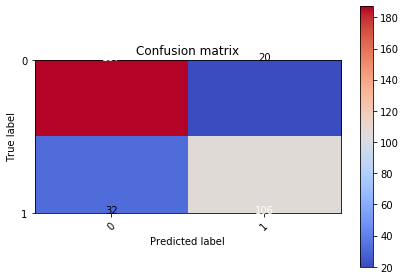

In [0]:
mostra_resultados(y_test, y_pred, modelo_floresta_aleatoria.classes_)

Em alguns casos, para melhorar o desempenho do modelo, será necessário realizar um balanceamento dos possíveis valores da <i>feature</i> resposta (<i>target</i>). Não é o caso do <i>dataset</i> do <b>Titanic</b>, mas iremos comparar os resultados dos modelos com balanceamento e sem posteriormente.

Para isso, iremos utilizar a função <a href="https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html"><b>resample</b></a>, do <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.utils">sklearn.utils</a>.

In [0]:
# CRIANDO UMA DUMMY BALANCEADA 50/50 COM RESAMPLE (sklearn.utils)
from sklearn.utils import resample

sobreviveu_dummy = dummy[dummy["sobreviveu"] == 1]
nao_sobreviveu_dummy = dummy[dummy["sobreviveu"] == 0]

# COMO A QUANTIDADE DE SOBREVIVENTES É MENOR QUE A QUANTIDADE DE NÃO SOBREVIVENTES, 
# IREMOS USAR O TAMANHO DA DUMMY DE SOBREVIVENTES COMO REFERÊNCIA PARA REAMOSTRAGEM

# PARAMETROS DO RESAMPLE
# n_samples = número de amostras aleatórias
# random_state = seed que será utilizada no processo de extração aleatória
tamanho_amostra = sobreviveu_dummy.shape[0]

nao_sobreviveu_dummy_amostra = resample(nao_sobreviveu_dummy, n_samples=tamanho_amostra)

dummy_balanceada = pd.concat([sobreviveu_dummy, nao_sobreviveu_dummy_amostra])

In [0]:
# VERIFICA QUANTIDADE DE SOBREVIVENTES E NÃO SOBREVIVENTES (PERCENTUAL)
round(dummy_balanceada["sobreviveu"].value_counts(normalize=True) * 100, 2)

1    50.0
0    50.0
Name: sobreviveu, dtype: float64